In [14]:
import torch.nn as nn
import torch 
from torch.utils.data import Dataset, DataLoader

import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from pathlib import Path

In [15]:
data_folder = Path('../data')
indian_all = data_folder/'indian-data'

df = pd.read_csv(indian_all/'all.csv', parse_dates=True, index_col=0)
df.head()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
Date,,,,,,,,,
2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


<AxesSubplot:xlabel='Date'>

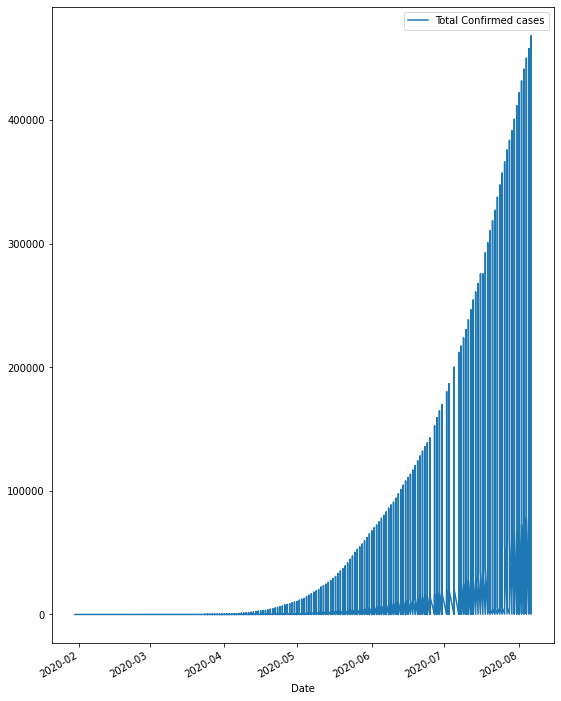

In [16]:
cols = ['Total Confirmed cases']
df_date = pd.DataFrame(index=df.index)
df_date_cc = df_date.join(df[cols])
# df_date_cc.plot??
df_date_cc.plot(figsize=(9,13))

In [17]:
df.index, df.columns, df.shape

(DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
                '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
                '2020-02-07', '2020-02-08',
                ...
                '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06',
                '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06',
                '2020-08-06', '2020-08-06'],
               dtype='datetime64[ns]', name='Date', length=4692, freq=None),
 Index(['Name of State / UT', 'Latitude', 'Longitude', 'Total Confirmed cases',
        'Death', 'Cured/Discharged/Migrated', 'New cases', 'New deaths',
        'New recovered'],
       dtype='object'),
 (4692, 9))

In [18]:
test_size = int(20*df.shape[0]/100)

train_data = df[: -test_size]
test_data = df[-test_size :]

In [19]:
len(test_data), len(train_data)

(938, 3754)

In [20]:
class TrainData(pd.DataFrame):
    
    def __init__(self, df):
        self.X_data = df.index
        self.y_data = df[cols]
        
    def __getitem__(self, date):
        return self.y_data[date]
    
    def __getlen__(self):
        return len(self.y_data)
    
class TestData(pd.DataFrame):
    def __init__(self, df):
        self.X_data = df.index
    
    # The data frame is indexed with dates not integers, so in order to 
    def __getlen__(self, df):
        return len(df)

In [21]:
df['Name of State / UT'].unique()

array(['Kerala', 'Delhi', 'Telengana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Union Territory of Ladakh',
       'Karnataka', 'Maharashtra', 'Punjab',
       'Union Territory of Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Union Territory of Chandigarh', 'Gujarat',
       'Chandigarh', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Nagaland',
       'Telangana', 'Telangana***'], dtype=object)

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_data[cols] = scaler.fit_transform(train_data[cols])
test_data[cols] = scaler.fit_transform(test_data[cols])

<ipython-input-41-712e33c00376>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[cols] = scaler.fit_transform(train_data[cols])
/Users/jay.0tist/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-41-712e33c00376>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [42]:
train_data

,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
Date,,,,,,,,,
2020-01-30,Kerala,10.8505,76.2711,0.000000,0,0.0,0,0,0
2020-01-31,Kerala,10.8505,76.2711,0.000000,0,0.0,0,0,0
2020-02-01,Kerala,10.8505,76.2711,0.000004,0,0.0,1,0,0
2020-02-02,Kerala,10.8505,76.2711,0.000009,0,0.0,1,0,0
2020-02-03,Kerala,10.8505,76.2711,0.000009,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
2020-07-10,Tamil Nadu,11.1271,78.6569,0.548921,1765,78161.0,4231,0,3994
2020-07-10,Telangana,18.1124,79.0193,0.134195,331,18192.0,1410,0,913
2020-07-10,Tripura,23.9408,91.9882,0.007697,1,1338.0,15,0,14


In [55]:
# creating seq_length for LSTM model
seq_len = 10

def create_sequence(data, seq_len):
    xs = list()
    ys = list()
    
    for i in range(len(data) - seq_len - 1):
        x = data.iloc[i:(i+seq_len)]
        y = data.iloc[i+seq_len]
        
        xs.append(np.array(x))
        ys.append(np.array(y))
        
    return xs, ys
    
X_train, y_train = create_sequence(train_data[cols], seq_len)
X_test, y_test = create_sequence(test_data[cols], seq_len)


X_train = torch.from_numpy(np.array(X_train)).float()
X_test = torch.from_numpy(np.array(X_test)).float()

y_train = torch.from_numpy(np.array(y_train)).float()
y_test = torch.from_numpy(np.array(y_test)).float()

In [ ]:
class LSTMmodel(nn.module):
    def __init__(self, in_features, hidden_units, seq_len, n_layers = 3):
        super(LSTMmodel, self).__init__()
        
        self.in_features = in_features
        self.hidden_units = hidden_units
        self.seq_len = seq_len
        self.n_layers = n_layers
        
        self.lstm = nn.LSTM(in_features, hidden_units, n_layers,
                           dropout=0.5)
        
        self.linear = nn.Linear(in_features, out_features=1)
        
    def forward(self, sequence):
        

In [56]:
nn.LSTM??